In [ ]:
# This makes histograms of line EWs as written out by IRAF

# Created 2019 Nov. 12 by E.S.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_iraf_10 = pd.read_csv("./data/iraf_ew_results/Window10.dat", delim_whitespace=True, 
                         names=["name","K","Hdel","Hgam","Hbet"])

In [3]:
df_iraf_28 = pd.read_csv("./data/iraf_ew_results/Window28.dat", delim_whitespace=True, 
                         names=["name","K","Hdel","Hgam","Hbet"])

In [4]:
df_iraf_56 = pd.read_csv("./data/iraf_ew_results/Window56.dat", delim_whitespace=True, 
                         names=["name","K","Hdel","Hgam","Hbet"])

In [5]:
df_robo = pd.read_csv("/Users/nyumbani/Documents/git.repos/rrlyrae_metallicity/rrlyrae_metallicity/junk_test_no_noise_rw_spectra//src/more_realistic_EWs_w_phase_test.csv")

In [6]:
df_robo.keys()

Index(['Unnamed: 0', 'empir_spec_name', 'star_name', 'Hbet', 'err_Hbet',
       'Hgam', 'err_Hgam', 'Hdel', 'err_Hdel', 'Heps', 'err_Heps', 'rHgam',
       'err_rHgam', 'balmer', 'err_balmer', 'K', 'err_K', 'phase'],
      dtype='object')

In [7]:
# Robospect EWs are fewer than those produced by IRAF, presumably because bad fits are
# not considered. So let's find what indices in the IRAF dataframes have matches in 
# the Robospect dataframe.

In [8]:
unique_index_10 = pd.Index(df_iraf_10["name"])
unique_index_28 = pd.Index(df_iraf_28["name"])
unique_index_56 = pd.Index(df_iraf_56["name"])
idx_in_iraf_10 = [unique_index_10.get_loc(i) for i in df_robo["empir_spec_name"]]
idx_in_iraf_28 = [unique_index_28.get_loc(i) for i in df_robo["empir_spec_name"]]
idx_in_iraf_56 = [unique_index_56.get_loc(i) for i in df_robo["empir_spec_name"]]

In [9]:
# get the order right

df_iraf_10_xmatched = df_iraf_10.iloc[idx_in_iraf_10]
df_iraf_28_xmatched = df_iraf_28.iloc[idx_in_iraf_28]
df_iraf_56_xmatched = df_iraf_56.iloc[idx_in_iraf_56]

In [99]:
# function to make the plots

def comparison_plot(line_string,verbose_string,iraf_window_string,iraf_df,saved_plot_name,annotate=False):
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    fig.suptitle(verbose_string + " comparison\n(dashed = 1-to-1)")

    axs[0].plot([0,15],[0,15],linestyle="--",color="k")
    axs[0].scatter(iraf_df[line_string],df_robo[line_string])
    if annotate:
        for i in range(0,len(df_robo)):
            axs[0].annotate(df_robo["empir_spec_name"].iloc[i], 
                            xy=(iraf_df[line_string].iloc[i], df_robo[line_string].iloc[i]), 
                            xytext=(iraf_df[line_string].iloc[i], df_robo[line_string].iloc[i]), fontsize=4)
    axs[0].set_title("(square plot)")
    axs[0].set_xlim([0,15])
    axs[0].set_ylim([0,15])
    axs[0].set_xlabel(verbose_string + " EW (IRAF, window of "+iraf_window_string+", $\AA$)")
    axs[0].set_ylabel(verbose_string + " EW (Robospect, $\AA$)")

    axs[1].plot([0,15],[0,15],linestyle="--",color="k")
    axs[1].scatter(iraf_df[line_string],df_robo[line_string])
    axs[1].set_title("(full plot)")
    axs[1].set_xlabel(verbose_string + " EW (IRAF, window of "+iraf_window_string+", $\AA$)")
    axs[1].set_ylabel(verbose_string + " EW (Robospect, $\AA$)")

    fig.tight_layout()
    fig.show()
    fig.savefig(saved_plot_name)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

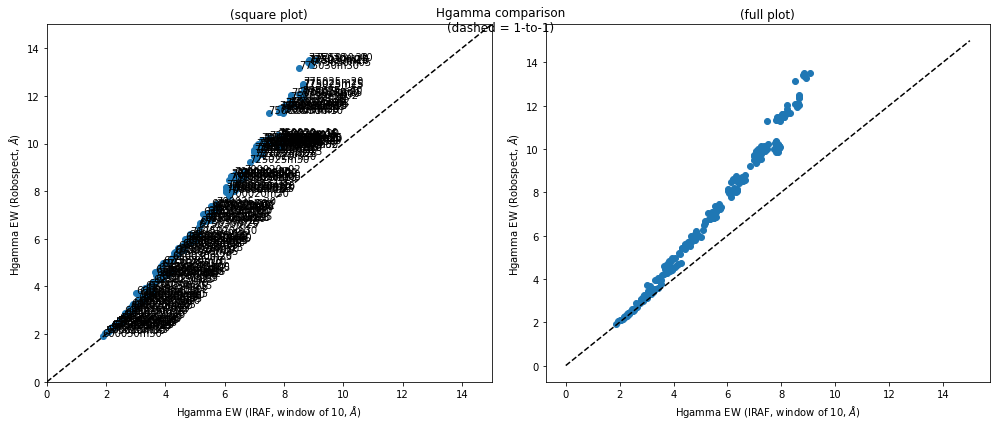

In [93]:
# comparisons with window of 10

comparison_plot(line_string = "K",
                verbose_string = "CaII K",
                iraf_window_string = "10",
                iraf_df = df_iraf_10_xmatched,
                saved_plot_name = "junk_comparison_caiik_window_10.pdf", 
                annotate=True)
comparison_plot(line_string = "Hdel",
                verbose_string = "Hdelta",
                iraf_window_string = "10",
                iraf_df = df_iraf_10_xmatched,
                saved_plot_name = "junk_comparison_hdel_window_10.pdf", 
                annotate=True)
comparison_plot(line_string = "Hbet",
                verbose_string = "Hbeta",
                iraf_window_string = "10",
                iraf_df = df_iraf_10_xmatched,
                saved_plot_name = "junk_comparison_hbeta_window_10.pdf", 
                annotate=True)
comparison_plot(line_string = "Hgam",
                verbose_string = "Hgamma",
                iraf_window_string = "10",
                iraf_df = df_iraf_10_xmatched,
                saved_plot_name = "junk_comparison_hgam_window_10.pdf", 
                annotate=True)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

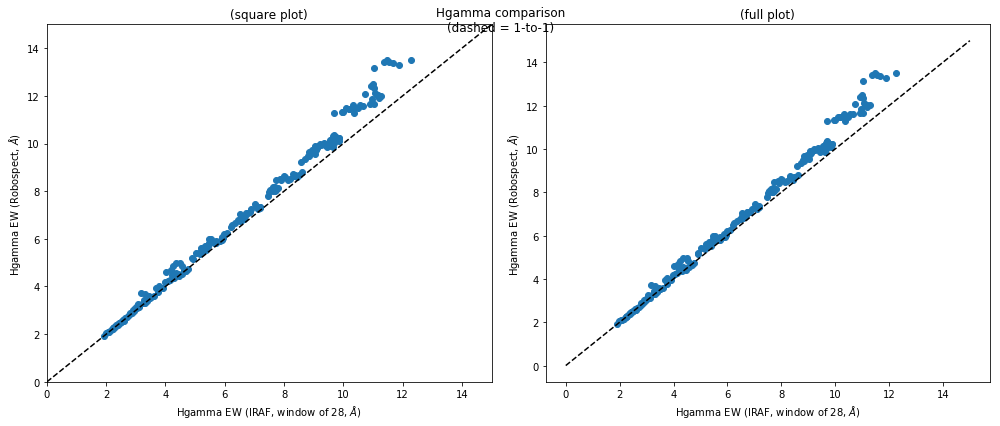

In [42]:
# comparisons with window of 28

comparison_plot(line_string = "K",
                verbose_string = "CaII K",
                iraf_window_string = "28",
                iraf_df = df_iraf_28_xmatched,
                saved_plot_name = "comparison_caiik_window_28.pdf")
comparison_plot(line_string = "Hdel",
                verbose_string = "Hdelta",
                iraf_window_string = "28",
                iraf_df = df_iraf_28_xmatched,
                saved_plot_name = "comparison_hdel_window_28.pdf")
comparison_plot(line_string = "Hbet",
                verbose_string = "Hbeta",
                iraf_window_string = "28",
                iraf_df = df_iraf_28_xmatched,
                saved_plot_name = "comparison_hbeta_window_28.pdf")
comparison_plot(line_string = "Hgam",
                verbose_string = "Hgamma",
                iraf_window_string = "28",
                iraf_df = df_iraf_28_xmatched,
                saved_plot_name = "comparison_hgam_window_28.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

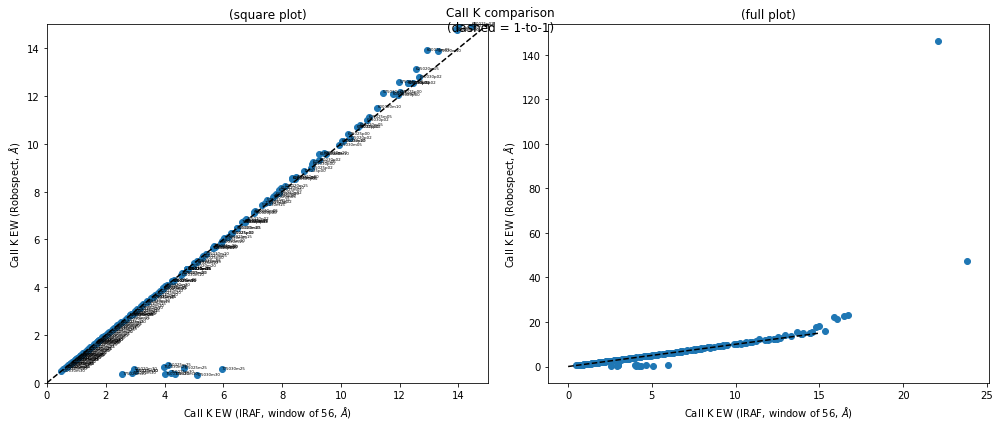

In [100]:
# comparisons with window of 28, annotated

comparison_plot(line_string = "K",
                verbose_string = "CaII K",
                iraf_window_string = "56",
                iraf_df = df_iraf_56_xmatched,
                saved_plot_name = "junk_comparison_caiik_window_56.pdf", annotate=True)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

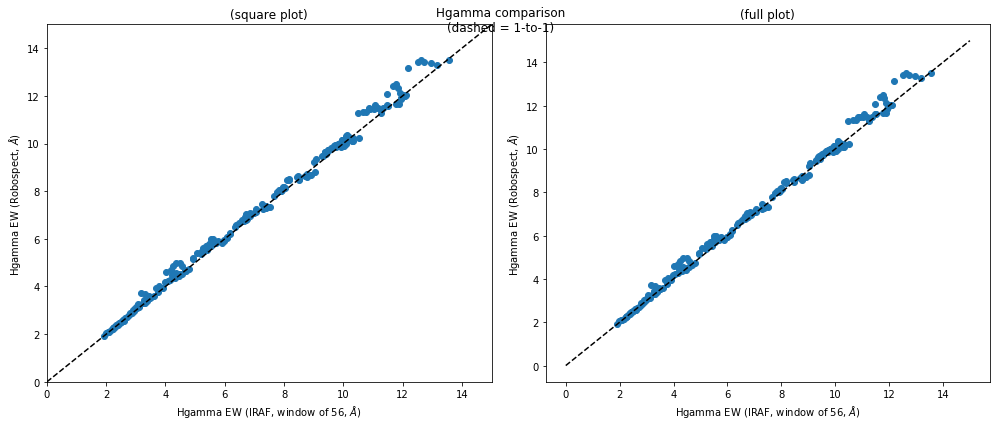

In [43]:
# comparisons with window of 56

comparison_plot(line_string = "K",
                verbose_string = "CaII K",
                iraf_window_string = "56",
                iraf_df = df_iraf_56_xmatched,
                saved_plot_name = "comparison_caiik_window_56.pdf")
comparison_plot(line_string = "Hdel",
                verbose_string = "Hdelta",
                iraf_window_string = "56",
                iraf_df = df_iraf_56_xmatched,
                saved_plot_name = "comparison_hdel_window_56.pdf")
comparison_plot(line_string = "Hbet",
                verbose_string = "Hbeta",
                iraf_window_string = "56",
                iraf_df = df_iraf_56_xmatched,
                saved_plot_name = "comparison_hbeta_window_56.pdf")
comparison_plot(line_string = "Hgam",
                verbose_string = "Hgamma",
                iraf_window_string = "56",
                iraf_df = df_iraf_56_xmatched,
                saved_plot_name = "comparison_hgam_window_56.pdf")

<Figure size 432x288 with 0 Axes>

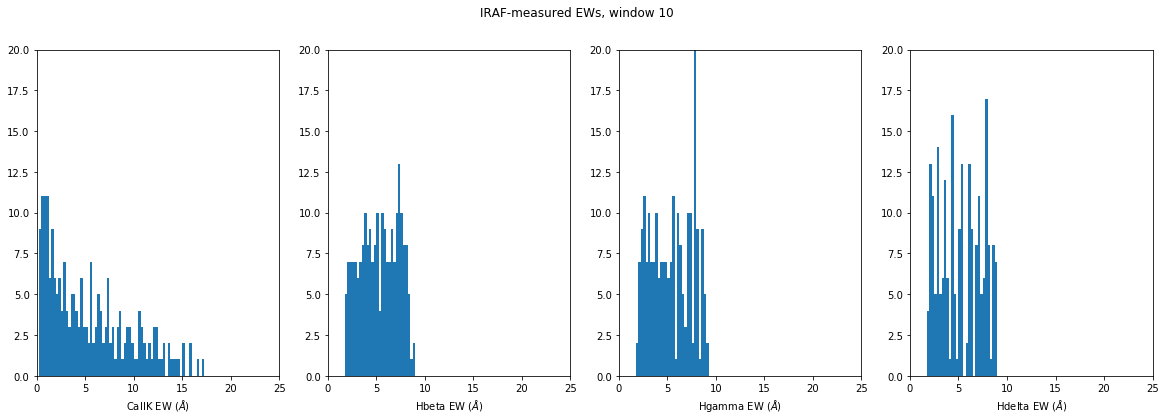

In [58]:
plt.clf()

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].hist(df_iraf_10["K"], bins=100, range=(0,25))
axs[0].set_xlim([0,25])
axs[0].set_ylim([0,20])
axs[0].set_xlabel("CaIIK EW ($\AA$)")

axs[1].hist(df_iraf_10["Hbet"], bins=100, range=(0,25))
axs[1].set_xlim([0,25])
axs[1].set_ylim([0,20])
axs[1].set_xlabel("Hbeta EW ($\AA$)")

axs[2].hist(df_iraf_10["Hgam"], bins=100, range=(0,25))
axs[2].set_xlim([0,25])
axs[2].set_ylim([0,20])
axs[2].set_xlabel("Hgamma EW ($\AA$)")

axs[3].hist(df_iraf_10["Hdel"], bins=100, range=(0,25))
axs[3].set_xlim([0,25])
axs[3].set_ylim([0,20])
axs[3].set_xlabel("Hdelta EW ($\AA$)")
   
plt.suptitle("IRAF-measured EWs, window 10")

plt.savefig("iraf_ews_window_10.pdf")
#plt.show()

<Figure size 432x288 with 0 Axes>

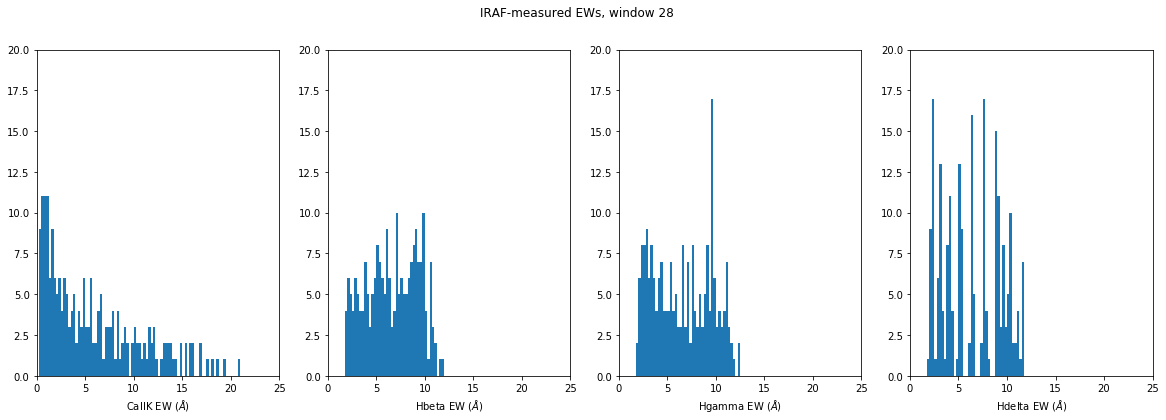

In [59]:
plt.clf()

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].hist(df_iraf_28["K"], bins=100, range=(0,25))
axs[0].set_xlim([0,25])
axs[0].set_ylim([0,20])
axs[0].set_xlabel("CaIIK EW ($\AA$)")

axs[1].hist(df_iraf_28["Hbet"], bins=100, range=(0,25))
axs[1].set_xlim([0,25])
axs[1].set_ylim([0,20])
axs[1].set_xlabel("Hbeta EW ($\AA$)")

axs[2].hist(df_iraf_28["Hgam"], bins=100, range=(0,25))
axs[2].set_xlim([0,25])
axs[2].set_ylim([0,20])
axs[2].set_xlabel("Hgamma EW ($\AA$)")

axs[3].hist(df_iraf_28["Hdel"], bins=100, range=(0,25))
axs[3].set_xlim([0,25])
axs[3].set_ylim([0,20])
axs[3].set_xlabel("Hdelta EW ($\AA$)")
   
plt.suptitle("IRAF-measured EWs, window 28")

plt.savefig("iraf_ews_window_28.pdf")
#plt.show()

<Figure size 432x288 with 0 Axes>

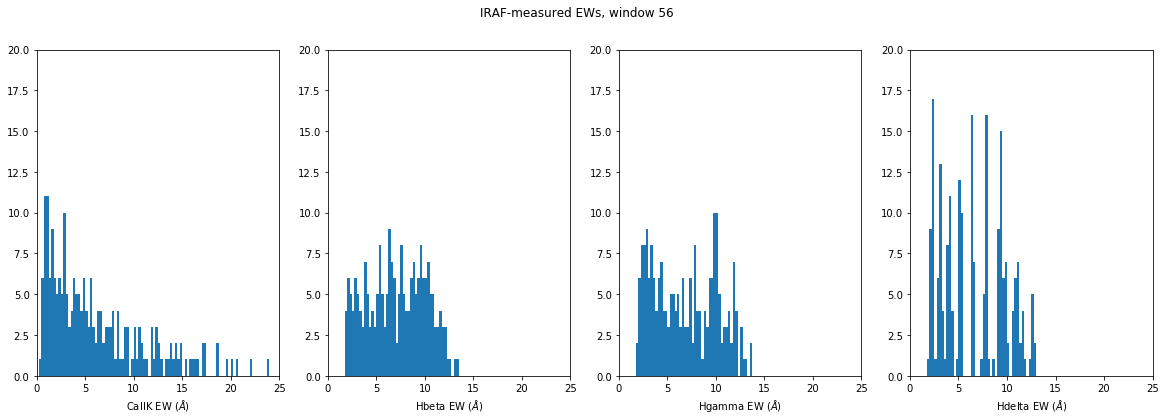

In [60]:
plt.clf()

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].hist(df_iraf_56["K"], bins=100, range=(0,25))
axs[0].set_xlim([0,25])
axs[0].set_ylim([0,20])
axs[0].set_xlabel("CaIIK EW ($\AA$)")

axs[1].hist(df_iraf_56["Hbet"], bins=100, range=(0,25))
axs[1].set_xlim([0,25])
axs[1].set_ylim([0,20])
axs[1].set_xlabel("Hbeta EW ($\AA$)")

axs[2].hist(df_iraf_56["Hgam"], bins=100, range=(0,25))
axs[2].set_xlim([0,25])
axs[2].set_ylim([0,20])
axs[2].set_xlabel("Hgamma EW ($\AA$)")

axs[3].hist(df_iraf_56["Hdel"], bins=100, range=(0,25))
axs[3].set_xlim([0,25])
axs[3].set_ylim([0,20])
axs[3].set_xlabel("Hdelta EW ($\AA$)")
   
plt.suptitle("IRAF-measured EWs, window 56")

plt.savefig("iraf_ews_window_56.pdf")
#plt.show()

<Figure size 432x288 with 0 Axes>

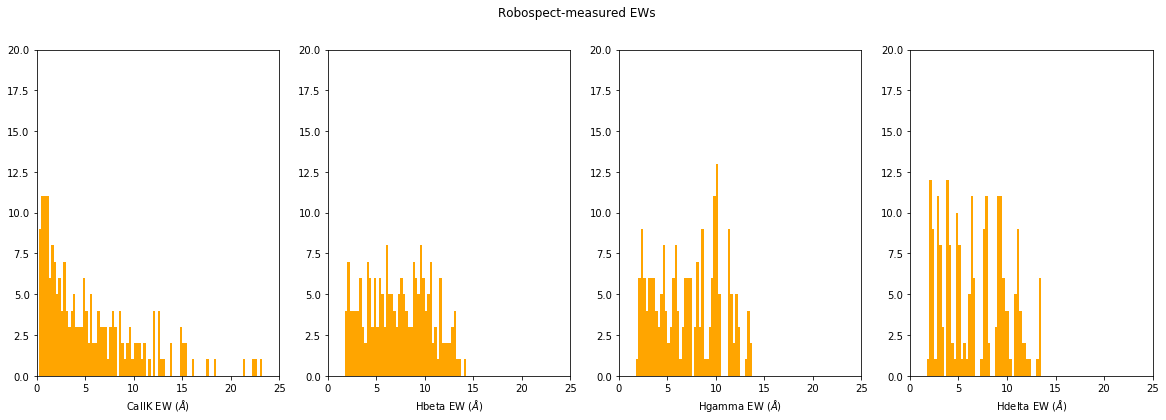

In [64]:
plt.clf()

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

axs[0].hist(df_robo["K"], bins=100, range=(0,25), color="orange")
axs[0].set_xlim([0,25])
axs[0].set_ylim([0,20])
axs[0].set_xlabel("CaIIK EW ($\AA$)")

axs[1].hist(df_robo["Hbet"], bins=100, range=(0,25), color="orange")
axs[1].set_xlim([0,25])
axs[1].set_ylim([0,20])
axs[1].set_xlabel("Hbeta EW ($\AA$)")

axs[2].hist(df_robo["Hgam"], bins=100, range=(0,25), color="orange")
axs[2].set_xlim([0,25])
axs[2].set_ylim([0,20])
axs[2].set_xlabel("Hgamma EW ($\AA$)")

axs[3].hist(df_robo["Hdel"], bins=100, range=(0,25), color="orange")
axs[3].set_xlim([0,25])
axs[3].set_ylim([0,20])
axs[3].set_xlabel("Hdelta EW ($\AA$)")
   
plt.suptitle("Robospect-measured EWs")

plt.savefig("robo_ews.pdf")
#plt.show()